In [1]:
#Author: Shayantan Banerjee
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

In [51]:
import pandas as pd
from sklearn.preprocessing import Imputer
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
import pickle
from sklearn.metrics import confusion_matrix
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import StratifiedKFold
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import RFECV
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
import scipy.stats as ss
import itertools
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.manifold import TSNE
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import LeaveOneOut
import mifs
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
import scipy
import numpy as np, scipy.stats as st
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neural_network import MLPClassifier
from scipy import interp
from collections import Counter

In [52]:
deg1=pd.read_table("DEG1.0txt")

In [53]:
l1_reg=['AATBC', 'ACP6', 'ADGRB3', 'AMPD1', 'ANK3', 'ANKRD36C', 'AOC2', 'AREG',
       'ARHGAP11B|LOC100288637', 'ARHGEF40', 'C12orf56', 'C19orf33', 'C1orf87',
       'C6orf226', 'CAPZA3', 'CCL18', 'COL4A3', 'CPLANE1', 'CTC1', 'CTH',
       'CTSL', 'CX3CR1', 'DCLK3', 'DCTN1-AS1', 'DDIT4', 'DDIT4L', 'DSCAML1',
       'EPPK1', 'FAM222A-AS1', 'FAM66C', 'FAM92A', 'GALNT6', 'GPNMB', 'GPR171',
       'GSTO1', 'GTPBP10', 'HIST1H3E', 'JUN', 'KIAA0586', 'KLHL23', 'KMO',
       'LILRA4', 'LINC00518', 'LINC00893', 'LINC01137', 'LINC02433',
       'LINC02544', 'LINC02579', 'LMO7DN', 'LOC100507516', 'LOC101927391',
       'LOC101928487', 'LOC105376037', 'LOC283038', 'LOC284865', 'LOC401442',
       'LRP2BP', 'MAGEB3', 'MAP3K7CL', 'MMP13', 'NCKAP5L', 'NECAB1', 'NLRP1',
       'NXN|RHBDL2', 'OR7E24', 'PAX8-AS1', 'PCDHB15', 'PLCB1', 'PLTP',
       'PLXNA4', 'PRAC1', 'PYGM', 'REG1B', 'RNF217-AS1', 'RTN1', 'SDC4',
       'SEPT7P2', 'SLC25A43', 'SLC44A3', 'TCEAL9', 'TEAD3', 'TMEM176B',
       'TNFAIP3', 'TTYH2', 'ZC2HC1B', 'ZNF484', 'ZNF674', 'ZXDA|ZXDB']

In [54]:
mrmr=['LRRC37A|LRRC37A3', 'PAM16', 'SDC4', 'PKHD1', 'KIF11', 'ULK2', 'BEND6',
       'DAOA-AS1', 'HMHB1', 'MAS1L', 'TCN1', 'MAP3K7CL', 'SLC5A1', 'CAMK1D',
       'WRAP53', 'SPRED2', 'SIGLEC16']

In [55]:
#concatenating the three feature lists
def Union(lst1, lst2): 
    final_list = lst1 + lst2 
    return final_list
feature_aggre=Union(Union(deg1['x'].tolist(),mrmr),l1_reg)
mylist = list(dict.fromkeys(feature_aggre))

In [57]:
data=pd.read_table("Gene_expression_without_controls.txt")
lab=pd.read_csv('labels_without_controls.txt')
y=lab['x'].astype('category').cat.codes

In [58]:
data.head(10)

,A1BG,A1BG-AS1,A1CF,A2M,A2M-AS1,A2ML1,A2MP1,A4GALT,A4GNT,AA06,...,ZWINT,ZXDA,ZXDA|ZXDB,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
0,5.4783,5.5562,4.38005,5.36375,4.6992,3.78330,6.3970,7.1905,4.3406,5.0975,...,6.6838,4.6482,4.25410,4.43355,6.232683,5.0827,7.113900,9.28435,5.915833,5.96300
1,5.5218,5.6292,4.45480,4.79720,4.6839,4.28380,6.3345,6.7634,4.0578,5.1819,...,7.7519,4.8541,4.22935,3.85635,6.228167,5.0560,8.274033,10.72825,6.008033,6.53555
2,5.3961,5.9805,4.80410,5.57900,5.6614,4.23930,6.9344,7.6834,4.3675,5.7251,...,6.2407,4.5151,4.25240,3.74830,5.457817,5.2001,6.370767,8.29315,5.708933,5.34015
3,5.4898,5.7417,4.56785,4.77960,5.5592,4.22800,5.4526,7.1383,4.1215,5.2230,...,8.6021,4.7943,4.16995,4.09635,6.235833,5.3694,7.648533,10.35275,5.583700,5.98235
4,5.2333,5.6149,4.28090,5.50210,4.3983,3.96675,5.8352,6.8692,4.3052,5.0453,...,9.4406,5.0753,3.99805,4.51725,5.820800,4.7759,6.609800,9.96975,5.824167,6.68905
5,5.1145,5.1255,3.98305,4.86580,5.8344,4.22245,6.0768,6.6950,4.4106,5.1940,...,6.1439,5.1411,4.25165,4.00945,6.254250,5.1328,8.582033,8.98740,5.667000,6.84560
6,5.8635,5.7155,4.57770,5.12280,6.3146,3.80760,6.2055,7.3145,4.3032,4.5546,...,9.0421,5.1097,4.18775,4.66530,5.783433,4.5143,6.285133,9.07805,5.845700,6.61700
7,6.2135,5.2366,5.31575,5.73190,5.9888,4.17960,5.3496,7.4584,4.7521,5.6987,...,7.9171,5.1695,4.41530,4.93095,5.836017,5.8393,6.715467,9.05510,5.594733,6.45725
8,6.1481,6.1432,4.78990,5.62275,6.4451,4.55265,6.2823,6.8510,4.9676,5.5955,...,7.4816,4.8315,4.51725,3.98485,5.683133,5.6468,6.497933,8.20265,5.764067,5.86195
9,5.1902,5.3532,4.01435,4.96340,4.4271,3.81760,5.5444,6.6491,4.2248,5.0732,...,5.8829,4.2650,3.96990,3.99575,6.567100,4.8117,8.475333,10.97400,6.172133,6.46855


In [59]:
subset=data[mylist]

In [60]:
subset.shape
X=subset

In [61]:
X.shape

(228, 120)

In [62]:
X.head(3)

,MMP8,OLFM4,CEACAM8,LCN2,RETN,IL1R2,LTF,TCN1,ELANE,CLEC5A,...,SLC44A3,TCEAL9,TEAD3,TMEM176B,TNFAIP3,TTYH2,ZC2HC1B,ZNF484,ZNF674,ZXDA|ZXDB
0,11.92515,9.8809,9.7849,12.1490,12.3596,13.68595,11.8759,9.9560,5.9019,8.9816,...,3.7684,5.0308,3.6185,6.62240,9.84210,5.15370,3.5722,4.0165,2.4708,4.25410
1,12.68455,11.6035,9.3088,12.5925,12.0684,13.58880,12.1626,10.5258,8.6122,8.9461,...,3.1388,3.7964,3.9276,6.59895,9.41105,5.75325,3.6877,4.0340,2.4721,4.22935
2,8.66905,11.2306,5.9323,9.9195,10.7973,13.30405,9.3591,7.5340,6.1853,9.1950,...,3.2830,3.4904,3.8792,8.57845,11.73205,5.46100,3.3063,4.0867,2.5347,4.25240


In [63]:
#scaling of the data for selecting the best features using GridSearchCV
from sklearn import preprocessing

x = X #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
X_scaled = pd.DataFrame(x_scaled)

In [25]:
#feature selection using GridsearchCV
#Logit
logreg=LogisticRegression()
penalty = ['l1', 'l2']
# Create regularization hyperparameter space
C = np.logspace(-3, 3, 10)
# Create hyperparameter options
hyperparameters = dict(C=C, penalty=penalty)
clf_logit = GridSearchCV(logreg, hyperparameters, cv=5, verbose=0)
best_model = clf_logit.fit(X_scaled,y)
print('Best Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Best C:', best_model.best_estimator_.get_params()['C'])

Best Penalty: l2
Best C: 2.154434690031882


/root/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [26]:
#feature selection using GridsearchCV
#SVM
SVM=SVC(kernel="linear")
tuned_parameters = [{'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]
clf_svm = GridSearchCV(SVC(), tuned_parameters, cv=5)
best_model_svm=clf_svm.fit(X_scaled,y)
print("Best parameters set found on development set:")
print()
print(clf_svm.best_params_)

Best parameters set found on development set:

{'C': 1, 'kernel': 'linear'}


/root/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [27]:
#feature selection using GridsearchCV
#Random forest
param_grid = { 
    'n_estimators': [100, 300, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}
clf_rf = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)
best_model_rf=clf_rf.fit(X_scaled,y)
print("Best parameters set found on development set:")
print()
print(clf_rf.best_params_)

/root/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best parameters set found on development set:

{'criterion': 'gini', 'max_depth': 8, 'max_features': 'sqrt', 'n_estimators': 300}


In [28]:
#feature selection using Decision trees
#Decision trees
parameters={'min_samples_split' : range(10,500,20),'max_depth': range(1,20,2)}
clf_dt = GridSearchCV(DecisionTreeClassifier(), parameters, cv=5)
best_model_dt=clf_dt.fit(X_scaled,y)
print("Best parameters set found on development set:")
print()
print(clf_dt.best_params_)


Best parameters set found on development set:

{'max_depth': 1, 'min_samples_split': 190}


/root/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [64]:
classifiers = {
                'Logit': LogisticRegression(penalty='l2',C=2.15),
                'SVM': SVC(C= 1,kernel= 'linear',probability=True),
                'RandomForest': RandomForestClassifier(criterion='gini',max_depth=8,max_features='sqrt',n_estimators=300),
                'DecisionTRees': DecisionTreeClassifier(max_depth=1,min_samples_split=190),
                'LinearDiscriminantAnalysis': LinearDiscriminantAnalysis(),
                                    }

Logit
Precision UnComp  0.9334876444482516 
 Conf interval (0.9334876444482516, 0.9291252516237807, 0.9378500372727225) 
 Recall Uncomp 0.9483398692810459 
 Conf interval (0.9483398692810459, 0.9435309516637264, 0.9531487868983654) 
 F1 uncomp 0.9394356553856049 
 Conf interval (0.9394356553856049, 0.9360584405277863, 0.9428128702434235) 

Precision comp 0.8355214285714286 
 Conf interval (0.8355214285714286, 0.8214542078288631, 0.8495886493139941) 
 Recall Comp 0.7615333333333333 
 Conf interval (0.7615333333333333, 0.7451063995787549, 0.7779602670879117) 
 F1 comp 0.7805407925407924 
 Conf interval (0.7805407925407924, 0.7677855883153752, 0.7932959967662097) 
 ROC  0.8549366013071895 
 Conf interval (0.8549366013071895, 0.8464434680511431, 0.8634297345632359)
Counter({'C6orf226': 500, 'FAM222A-AS1': 500, 'GPNMB': 500, 'SDC4': 500, 'TEAD3': 500, 'ZC2HC1B': 500, 'ANKRD36C': 499, 'DDIT4L': 499, 'LINC02544': 499, 'OR7E24': 499, 'GTPBP10': 498, 'ZNF484': 498, 'NXN|RHBDL2': 497, 'C19orf33'

/root/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/root/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/root/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/root/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_f

Precision UnComp  0.8489127413977865 
 Conf interval (0.8489127413977865, 0.8448739159382044, 0.8529515668573686) 
 Recall Uncomp 0.9811503267973858 
 Conf interval (0.9811503267973858, 0.9782278876604411, 0.9840727659343305) 
 F1 uncomp 0.9094243171600191 
 Conf interval (0.9094243171600191, 0.9066629283683353, 0.912185705951703) 

Precision comp 0.8413666666666667 
 Conf interval (0.8413666666666667, 0.8172997404894663, 0.8654335928438671) 
 Recall Comp 0.39766666666666667 
 Conf interval (0.39766666666666667, 0.37950640839915506, 0.4158269249341783) 
 F1 comp 0.5167502164502163 
 Conf interval (0.5167502164502163, 0.49747046703310654, 0.5360299658673262) 
 ROC  0.6894084967320262 
 Conf interval (0.6894084967320262, 0.680186560294411, 0.6986304331696414)
Counter({'AATBC': 500, 'ANK3': 500, 'ANKRD36C': 500, 'AOC2': 500, 'AREG': 500, 'ARHGEF40': 500, 'C19orf33': 500, 'C1orf87': 500, 'C6orf226': 500, 'CAMK1D': 500, 'CEP55': 500, 'CLEC5A': 500, 'CTC1': 500, 'CTH': 500, 'CTSL': 500, 'CX3

/root/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/root/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/root/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/root/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_f

Precision UnComp  0.8503160111126965 
 Conf interval (0.8503160111126965, 0.845578601455333, 0.85505342077006) 
 Recall Uncomp 0.8970588235294117 
 Conf interval (0.8970588235294117, 0.8898611323341528, 0.9042565147246706) 
 F1 uncomp 0.8700374409028342 
 Conf interval (0.8700374409028342, 0.8659383343960781, 0.8741365474095902) 

Precision comp 0.5378373015873016 
 Conf interval (0.5378373015873016, 0.5134135221907028, 0.5622610809839004) 
 Recall Comp 0.4487333333333334 
 Conf interval (0.4487333333333334, 0.42779038343074843, 0.4696762832359183) 
 F1 comp 0.4691663614163614 
 Conf interval (0.4691663614163614, 0.44936343083940045, 0.4889692919933224) 
 ROC  0.6728960784313726 
 Conf interval (0.6728960784313726, 0.6629947862162455, 0.6827973706464996)
Counter({'ZXDA|ZXDB': 500, 'ZNF674': 500, 'ZNF484': 500, 'ZC2HC1B': 500, 'TTYH2': 500, 'TNFAIP3': 500, 'TMEM176B': 500, 'TEAD3': 500, 'SDC4': 458, 'MAS1L': 458, 'TCEAL9': 42, 'SLC44A3': 42})
Median optimal number of features  1.0
Linea

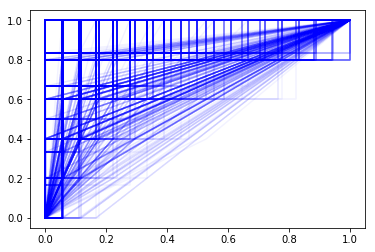

In [38]:
#Running the repeated CV for stablity analysis of our models. Five different classifiers have been used
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)
for i in classifiers:
    print(i)
    model=classifiers[i]
    cross_validated(i,model,X,y,10)
  

In [65]:
#Repeated CV 50 times and averaging the classification metrics for all 50 runs. Also printing the best set of features
#selected across all folds 
def cross_validated(j,model,X,y,k):
    i=0
    rskf = RepeatedStratifiedKFold(n_splits=10, n_repeats=50,random_state=36851234)
    precision_comp=[]
    recall_comp=[]
    f1_comp=[]
    roc_comp=[]
    precision_uncomp=[]
    recall_uncomp=[]
    f1_uncomp=[]
    tprs=[]
    base_fpr = np.linspace(0, 1, 101)
    fold=[]
    o=[]
    opti=[]
    for train_index,test_index in rskf.split(X,y):
        X_train,X_test=X.iloc[train_index],X.iloc[test_index]
        y_train,y_test=y.iloc[train_index],y.iloc[test_index]
        X_train_reduced, f,o=feature_reduction_using_RFECV(model,X_train,y_train)
        fold.append(f)
        opti.append(o)
        X_test_reduced=X_test[X_train_reduced.columns]
        model.fit(X_train_reduced,y_train)
        ktest_pred_y = model.predict(X_test_reduced)
        y_score = model.predict_proba(X_test_reduced)
        fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])
        ktest_rocauc = roc_auc_score(y_test, ktest_pred_y)
        report=classification_report(y_test,ktest_pred_y,target_names=["Not complicated","Complicated"],output_dict=True)
        precision_comp.append(report["Complicated"]["precision"])
        recall_comp.append(report["Complicated"]["recall"])
        f1_comp.append(report['Complicated']["f1-score"])
        roc_comp.append(ktest_rocauc)
        precision_uncomp.append(report["Not complicated"]["precision"])
        recall_uncomp.append(report["Not complicated"]["recall"])
        f1_uncomp.append(report['Not complicated']["f1-score"])
        
    print("Precision UnComp ",np.mean(precision_uncomp),"\n","Conf interval",mean_confidence_interval(precision_uncomp), "\n","Recall Uncomp",np.mean(recall_uncomp),"\n","Conf interval",mean_confidence_interval(recall_uncomp),"\n", "F1 uncomp",np.mean(f1_uncomp), "\n","Conf interval",mean_confidence_interval(f1_uncomp),"\n",)
    print("Precision comp",np.mean(precision_comp),"\n","Conf interval",mean_confidence_interval(precision_comp),"\n", "Recall Comp",np.mean(recall_comp),"\n","Conf interval",mean_confidence_interval(recall_comp), "\n","F1 comp",np.mean(f1_comp),"\n", "Conf interval",mean_confidence_interval(f1_comp),"\n","ROC ",np.mean(roc_comp),"\n","Conf interval",mean_confidence_interval(roc_comp))
    flat_list = [item for sublist in fold for item in sublist]
    merged = list(itertools.chain(*flat_list))
    x=Counter(merged)
    print(x)
    print("Median optimal number of features ",np.median(opti))

  


In [31]:
#printing the CI for each classification metric
def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, m-h, m+h

In [32]:
#Recursive feature elmination for each fold of the cross validation
def feature_reduction_using_RFECV(model,X,y):
    feature_list=[]
    np.random.seed(315)
    
    rfecv = RFECV(estimator=model, step=1, cv=StratifiedKFold(10,random_state=1),
                  scoring='roc_auc')
    rfecv.fit(X, y)
    names=X.columns # the names of the genes selected 
    new_X=X[X.columns[rfecv.support_==True]]
    #returns the feature reduced dataset, number of features selcted for this run, names of the features selcted for this run
    return new_X,rfecv.n_features_,new_X.columns